### 对测试数据及如何归一化?

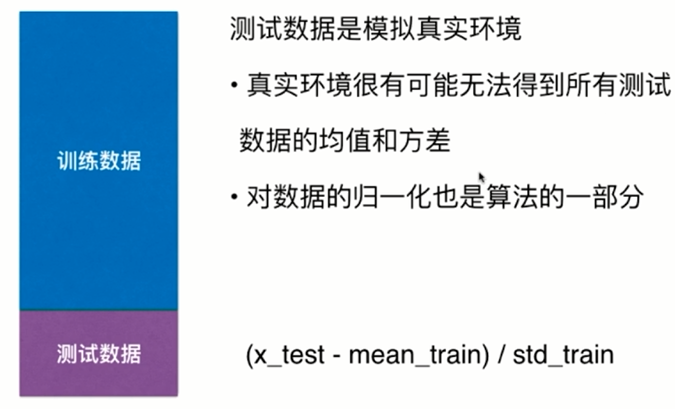

需要保存训练数据集得到的均值和方差

scikit-learn 中使用Scaler

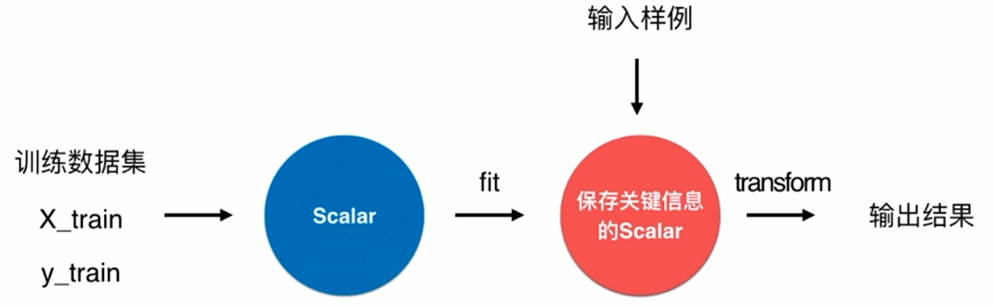

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X[:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=88)

### scikit-learn中的StandarScaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
standardScaler = StandardScaler()

In [8]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
standardScaler.mean_

array([5.83916667, 3.04      , 3.71083333, 1.18083333])

standardScaler.std_被弃用,使用下面这个个方法

In [10]:
standardScaler.scale_

array([0.83209533, 0.40669399, 1.7521794 , 0.75490572])

In [11]:
standardScaler.transform(X_train)

array([[-0.40760554,  2.85226739, -1.31883375, -1.29927925],
       [-0.52778408,  0.88518643, -1.26176197, -1.03434551],
       [-1.2488553 , -0.09835405, -1.31883375, -1.16681238],
       [ 0.55382276, -0.59012429,  0.79282217,  0.42279011],
       [-0.76814115, -0.83600941,  0.10796079,  0.29032323],
       [ 0.79417984, -0.09835405,  1.19232464,  1.35005822],
       [-1.36903384,  0.39341619, -1.20469019, -1.29927925],
       [ 1.87578668, -0.59012429,  1.36353998,  0.9526576 ],
       [-1.72956945,  0.39341619, -1.37590554, -1.29927925],
       [ 0.19328715, -0.09835405,  0.62160682,  0.82019073],
       [ 1.75560814, -0.34423917,  1.47768355,  0.82019073],
       [ 1.27489399,  0.14753107,  0.96403751,  1.21759135],
       [ 0.43364422, -0.59012429,  0.62160682,  0.82019073],
       [-0.40760554,  1.13107155, -1.37590554, -1.29927925],
       [-0.88831969, -1.32777965, -0.40568525, -0.10707739],
       [ 0.55382276, -0.34423917,  1.07818108,  0.82019073],
       [ 0.55382276, -1.

注意上面的X_train并没有改变,需要改变X_train = standardScaler.transform(X_train)

In [12]:
X_train

array([[5.5, 4.2, 1.4, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [5.2, 2.7, 3.9, 1.4],
       [6.5, 3. , 5.8, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 3. , 4.8, 1.8],
       [7.3, 2.9, 6.3, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.2, 2.8, 4.8, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [6.4, 2.8, 5.6, 2.1],
       [6.1, 3. , 4.6, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [5. , 3.4, 1.6, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.5, 2.4, 3.7, 1. ],
       [6.5, 3. , 5.2, 2. ],
       [6.7, 3.3, 5.7, 2.1],
       [5.8, 2.7, 3.9, 1.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.3, 2.5, 5. , 1.9],
       [6.6, 2.9, 4.6, 1.3],
       [6. , 2

In [13]:
X_test_standard = standardScaler.transform(X_test)

In [14]:
X_test_standard[:2,:]

array([[-0.52778408, -0.09835405,  0.45039148,  0.42279011],
       [ 1.27489399,  0.39341619,  1.13525286,  1.48252509]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
knn_clf.score(X_test_standard, y_test)

0.3

In [19]:
knn_clf.score(X_test, y_test)

1.0

上面的结果说明没有归一化的数据集是有问题的

### 手写预处理函数

In [20]:
import numpy as np


class StandardScaler:

    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        """根据训练数据集X获得数据的均值和方差"""
        assert X.ndim == 2, "The dimension of X must be 2"

        self.mean_ = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
        self.scale_ = np.array([np.std(X[:,i]) for i in range(X.shape[1])])

        return self

    def transform(self, X):
        """将X根据这个StandardScaler进行均值方差归一化处理"""
        assert X.ndim == 2, "The dimension of X must be 2"
        assert self.mean_ is not None and self.scale_ is not None, \
               "must fit before transform!"
        assert X.shape[1] == len(self.mean_), \
               "the feature number of X must be equal to mean_ and std_"

        resX = np.empty(shape=X.shape, dtype=float)
        for col in range(X.shape[1]):
            resX[:,col] = (X[:,col] - self.mean_[col]) / self.scale_[col]
        return resX

        